In [38]:
#! pip install xgboost
# XGBOOST는 속도와 성능이 타 알고리즘에 비해 우수하다.

In [4]:
import xgboost

In [5]:
xgboost.__version__

'1.2.1'

In [6]:
from xgboost import XGBClassifier

In [9]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv -O data/pima-indians-diabetes.csv

--2020-12-01 13:03:20--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: 'data/pima-indians-diabetes.csv'

     0K .......... .......... ..                              100%  391K=0.06s

2020-12-01 13:03:21 (391 KB/s) - 'data/pima-indians-diabetes.csv' saved [23278/23278]



In [11]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('data/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.02%


In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
# load data
dataset = loadtxt('data/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

In [16]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [19]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.60491
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.55934
[2]	validation_0-logloss:0.53068
[3]	validation_0-logloss:0.51795
[4]	validation_0-logloss:0.51153
[5]	validation_0-logloss:0.50935
[6]	validation_0-logloss:0.50818
[7]	validation_0-logloss:0.51097
[8]	validation_0-logloss:0.51760
[9]	validation_0-logloss:0.51912
[10]	validation_0-logloss:0.52503
[11]	validation_0-logloss:0.52697
[12]	validation_0-logloss:0.53335
[13]	validation_0-logloss:0.53905
[14]	validation_0-logloss:0.54546
[15]	validation_0-logloss:0.54613
[16]	validation_0-logloss:0.54982
Stopping. Best iteration:
[6]	validation_0-logloss:0.50818



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.41%


In [21]:
print(model.feature_importances_)

[0.06669603 0.28271106 0.07985319 0.07951089 0.10537349 0.1623834
 0.10070346 0.12276844]


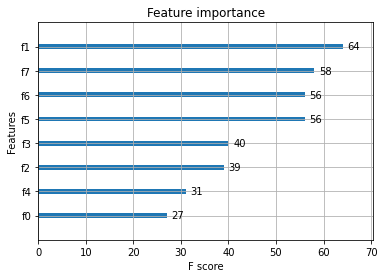

In [25]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

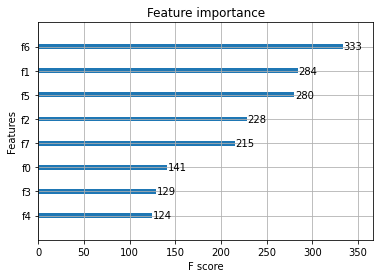

In [27]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
dataset = loadtxt('data/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [28]:
# Tune learning_rate
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# load data
dataset = loadtxt('data/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.530152 using {'learning_rate': 0.01}
-0.689563 (0.000760) with: {'learning_rate': 0.0001}
-0.660868 (0.006202) with: {'learning_rate': 0.001}
-0.530152 (0.034452) with: {'learning_rate': 0.01}
-0.552723 (0.117636) with: {'learning_rate': 0.1}
-0.653341 (0.171609) with: {'learning_rate': 0.2}
-0.718789 (0.176641) with: {'learning_rate': 0.3}


In [36]:
model = XGBClassifier(learning_rate=0.01)
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

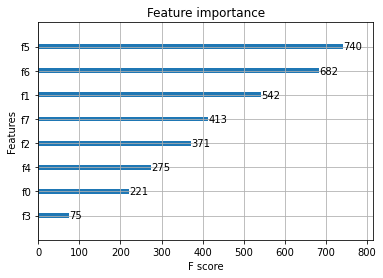

In [37]:
plot_importance(model)
pyplot.show()

In [39]:
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv -O data/iris.csv

--2020-12-01 13:38:25--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4549 (4.4K) [text/plain]
Saving to: 'data/iris.csv'

     0K ....                                                  100%  393K=0.01s

2020-12-01 13:38:26 (393 KB/s) - 'data/iris.csv' saved [4549/4549]



In [40]:

# multiclass classification
import pandas
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# load data
data = pandas.read_csv('data/iris.csv', header=None)
dataset = data.values
# split data into X and y
X = dataset[:,0:4]
Y = dataset[:,4]
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 92.00%


In [41]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv -O data/breast-cancer.csv

--2020-12-01 13:40:03--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24373 (24K) [text/plain]
Saving to: 'data/breast-cancer.csv'

     0K .......... .......... ...                             100%  763K=0.03s

2020-12-01 13:40:03 (763 KB/s) - 'data/breast-cancer.csv' saved [24373/24373]

